In [1]:
#!pip install --upgrade s-dbw
#!pip install imbalanced-learn
#!pip install scikit-learn-extra
#!pip install factor_analyzer
#!pip install prince
# !pip install selenium

In [2]:
# importing packages
from PIL import Image
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from sklearn.neighbors import KNeighborsClassifier
import prince
import pickle
from sklearn_extra.cluster import KMedoids
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import os
# !pip install factor_analyzer
import factor_analyzer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import cluster
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn import preprocessing

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from datetime import datetime
from collections import Counter
from collections import defaultdict
from tqdm import tqdm
from random import choices
from sklearn.cluster import DBSCAN
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
sns.set_style("darkgrid")
from sklearn.linear_model import SGDClassifier
import sklearn
from sklearn import linear_model
from sklearn.metrics import precision_score
import umap

C:\Users\fredg\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fredg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\fredg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 1- IMPORTING DATA - RENAMING COLUMNS

In [3]:
# read file funtion
def read_file():
    path="datasets/A1_B2_data.csv"
    df=pd.read_csv(path)
    
    if "class" in list(df.columns):
        del rfm["class"]
    if 'fullVisitorId' and "date" in df.columns:
        df.set_index(['date','fullVisitorId'],inplace=True)
    try:
        del df['socialEngagementType']
        del df['buyers']
    except:
        pass
    
    # removes the dates multi index (can be retrieved later)
    df.reset_index(inplace=True)
    try:
        dates=df["date"].values
    except:
        pass
    try:
        del df["date"]
    except:
        pass
    try:
        del df["clusters"]
    except:
        pass
    # there are 2 nas
    df.fillna(0,inplace=True)
    df.set_index('fullVisitorId',inplace=True)
    
    colonnes=['hits',
     'pageviews',
     'timeOnSite',
     'browser_woe',
     'country_woe',
     'source_woe',
     'transactions',
     'hits.eCom',
     'hour_ordinal',
     'newVisits',
     'bounces',
     'c_Direct',
     'c_Display',
     'c_Organic',
     'c_PaidSearch',
     'c_Referral',
     'c_Social',
     'medium_affiliate',
     'medium_cpc',
     'medium_cpm',
     'medium_organic',
     'medium_referral',
     'isDirect',
     'OS_Android',
     'OS_BlackBerry',
     'OS_Chrome OS',
     'OS_Firefox OS',
     'OS_Linux',
     'OS_Macintosh',
     'OS_Nintendo Wii',
     'OS_Samsung',
     'OS_Windows',
     'OS_Windows Phone',
     'OS_Xbox',
     'OS_iOS',
     'device_mobile',
     'device_tablet',
     'recency',
     'monetary',
     'frequency',
     'repurchasers']

    
    dico={'totals.hits':"hits",
     'totals.pageviews':"pageviews",
     'totals.timeOnSite':"timeOnSite",
    'totals.transactions':"transactions",
     'totals.newVisits':"newVisits",
     'totals.bounces':"bounces",
     'hits.eCommerceAction.action_type':'hits.eCom',
     'Monetary':"monetary",
     'Frequency':"frequency",
     'repurchasers':"repurchasers",
     'Recency':"recency",
     'hits.hour_ordinal':"hour_ordinal",
            'channelGrouping_Direct':'c_direct',
     'channelGrouping_Display':'c_display',
           'channelGrouping_Organic Search':'c_organic_search',
     'channelGrouping_Paid Search':'c_paid_search',
           'channelGrouping_Referral':'c_referral',
     'channelGrouping_Social':"c_social",
           'geoNetwork.country_woe':'country_woe',
     'trafficSource.source_woe':"source_woe",
           'trafficSource.medium_affiliate':"med_affiliate",
     'trafficSource.medium_cpc':"med_cpc",
           'trafficSource.medium_cpm':"med_cpm",
     'trafficSource.medium_organic':'med_organic',
           'trafficSource.medium_referral':'med_referral',
     'trafficSource.isTrueDirect_code':'direct_is_true',
           'device.browser_woe':"browser_woe",
     'device.operatingSystem_Android':'OS_android',
           'device.operatingSystem_BlackBerry':'OS_blackberry',
     'device.operatingSystem_Chrome OS':'OS_chrome',
           'device.operatingSystem_Firefox OS':'OS_firefox',
     'device.operatingSystem_Linux':'OS_linux',
           'device.operatingSystem_Macintosh':'OS_mac',
           'device.operatingSystem_Nintendo Wii':'OS_wii',
     'device.operatingSystem_Samsung':'OS_samsung',
           'device.operatingSystem_Windows':'OS_windows',
           'device.operatingSystem_Windows Phone':"OS_windwsphone",
     'device.operatingSystem_Xbox':'OS_xbox',
           'device.operatingSystem_iOS':'OS_ios',
     'device.deviceCategory_mobile':'mobile',
           'device.deviceCategory_tablet':'tablet'}
    
    df.rename(columns = dico, inplace = True)
    
    # if drop_first_column=False in one-hot encoding
    try:
        df.rename(columns = {'device.deviceCategory_desktop':'desktop',
                             'channelGrouping_Affiliates':'c_affiliates',
                             'device.operatingSystem_(not set)':'OS_notset',
                             'trafficSource.medium_(none)':'med_none'}
                             , inplace = True)
        
    except:
        pass
      
    return df
      
df=read_file()

## 2- REBALANCING CLASSES

In [4]:
def class_rebalance(df):
    try:
        del df["CLUSTERS"]
    except:
        pass
    
    df["buyers"]=df["monetary"]>0
    targetclass="buyers"

    cols=list(df.columns)
    cols.remove(targetclass)

    ## set predictor x 
    x=df[cols]
    ## set y target
    y=df[targetclass]
    
    # rebalance
    smote = SMOTE()
    # fit predictor and target variable
    x_smote, y_smote = smote.fit_resample(x, y)
    # print('Original dataset shape', Counter(y))
    # print('Resample dataset shape', Counter(y_smote))
    
    fig = plt.figure()
    fig.set_size_inches(8, 3)

    ax1 = plt.subplot(121)
    ax1=sns.countplot(df[targetclass])
    ax1.set_xlabel("Buyers",fontsize=12)
    ax1.set_xticklabels(['0','1'])
    ax1.set_ylabel("Count",fontsize=12)
    ax1.set_title("Before rebalancing",fontsize=14)
    ax1.set_facecolor('#EAEAF2')
    
    ax2 = plt.subplot(122)
    ax2=sns.countplot(y_smote)
    ax2.set_xlabel("Buyers",fontsize=12)
    ax2.set_xticklabels(['0','1'])
    ax2.set_ylabel(" ",fontsize=12)
    ax2.set_title("After rebalancing",fontsize=14)
    ax2.set_facecolor('#EAEAF2')
    
    
    fig.savefig('visualizations/rebalancing.png', bbox_inches='tight')
    
    rebalanced_df=pd.concat([x_smote, y_smote], axis=1)
    del rebalanced_df[targetclass]
    del df[targetclass]
    return rebalanced_df

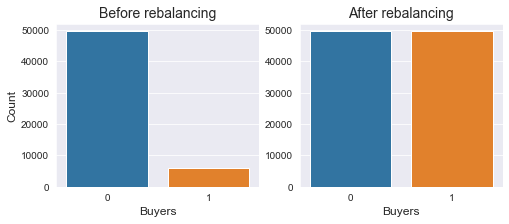

In [5]:
df_original=df.copy()
df_full=class_rebalance(df.copy())


## 3- SCALING DATA SETS 

In [6]:
# scaling and unscaling handy functions, returns either a DataFrame or a numpy array
def unscale(df_scaled,scaler,array=False):
    if not array:        
        df_unscaled=pd.DataFrame(scaler.inverse_transform(df_scaled),index=df_scaled.index, columns=list(df_scaled.columns))
    else:
        df_unscaled=scaler.inverse_transform(df_scaled)
    return df_unscaled

# returns scaled df or array depending on array option
def scale(df,num_cols,array=False):
    
    idx=df.index
    cols=list(df.columns)

    
    # identifying numeric columns
    
    
    
    # identifying categorical columns
    cat_cols=list(set(cols)-set(num_cols))
    
    # fitting scaler and then transforming 
    scaler = preprocessing.StandardScaler().fit(df[num_cols])

    num_arr=scaler.transform(df[num_cols])
    
    # concatenating with categorical values
    cat_arr=np.array(df[cat_cols])
    scaled_arr=np.hstack((num_arr,cat_arr))
    
    # returning final columns
    final_cols=num_cols+cat_cols
    
    # if array==True return array 
    if array:
        return scaled_arr, scaler, idx, final_cols
    
    else:     
        df_scaled=pd.DataFrame(data=scaled_arr,index=idx, columns=final_cols)
        return df_scaled, scaler, idx, final_cols 
    
num_cols=['pageviews','timeOnSite',
                 'browser_woe','country_woe',
                 'source_woe','transactions',
                 'hits.eCom','hour_ordinal',
                  'recency','monetary'] 

df_scaled, scaler, index, final_cols=scale(read_file(),num_cols)       
df_scaled_full, scaler_full, index_full, final_cols=scale(df_full,num_cols) 

## 4- PERFORMING DIMENSION REDUCTION ANALYSIS

### 4.1.  PCA

In [7]:
# visualize PCA optimal number of components
def spree_PCA(X_scaled,full):
    try:
        del X_scaled["CLUSTERS"]
    except:
        pass
    try:
        del full["CLUSTERS"]
    except:
        pass
    
    pca1 = PCA().fit(X_scaled)
    liste_pca=list(np.cumsum(pca1.explained_variance_ratio_))
    liste_pca.append(0)
    liste_pca=sorted(liste_pca)
    pca_cum=pd.Series(liste_pca, index=range(0,len(liste_pca)),name="pca_cum").round(3)
    
    
    fig = plt.figure()
    fig.set_size_inches(14, 4)

    # Visualizing PCA
    x_values2=np.arange(0,5)
    ax0 = plt.subplot(121)
    ax0=pca_cum.plot(marker='o',markersize=4)
    ax0.set_xlabel('N components',size=14)
    ax0.set_ylabel('Cum explained variance',size=14)
    ax0.set_title("PCA Spree Chart", fontsize=14, fontweight='bold',pad=10)
    ax0.axvline(x=2,color='black',alpha=0.5,ls="--")
    
    if full:
        fig.savefig('visualizations/pca_spree_full.png', bbox_inches='tight')
    else:
        fig.savefig('visualizations/pca_spree.png', bbox_inches='tight')
        
    
    return pca1,pca_cum

## transforming data with PCA=2 and visualizing components
def heat_map_pca(groupe_z,full):
    fig = plt.figure()
    fig.set_size_inches(40, 1)
    
    ax = plt.subplot(121)
    ax = sns.heatmap(groupe_z,vmin=-2, vmax=2, cmap=sns.diverging_palette(400,-200, n=10),center=0,annot=False,
                     linewidths=.5, linecolor='white')
    ax.set_title("PCA components interpretation, balanced class = {}".format(full),fontsize=12)


    if full:
        fig.savefig('visualizations/pca_heat_map_full.png', bbox_inches='tight')
    else:
        fig.savefig('visualizations/pca_heat_map.png', bbox_inches='tight')
        



def pca_transfo(df, full):
    col_pca=[]
    cols=list(df.columns)
    index=df.index
    pcn=2
    X_scaled=df
    
      
    pca2=PCA(n_components=pcn).fit(X_scaled)
    pca_transformed=pca2.transform(X_scaled)
    pca_components=pd.DataFrame(pca2.components_.transpose(),index=cols)
    pca_components.columns=['PC1','PC2']
    
    pca_transformed=pd.DataFrame(data=pca_transformed,columns=['PC1','PC2'], index=index)
        
    heat_map_pca(np.round(pca_components.T,3),full)
    if full:
        # saves pca model model
        filename="models/pca_components.sav"
        pickle.dump(pca, open(filename, 'wb'))
        pca_transformed.to_csv("results/pca_transformed_full.csv")
        
        
    return pca_transformed,pca_components,pca2

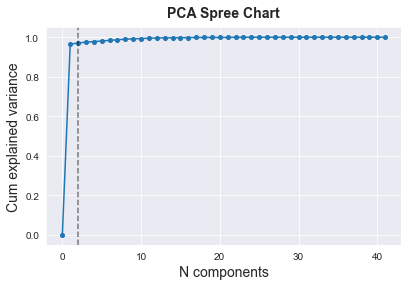

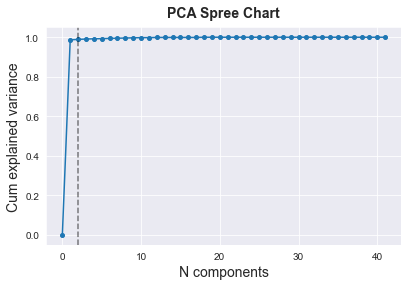

In [8]:
pca,pca_cum=spree_PCA(df_scaled,full=False)
pca_full,pca_cum_full=spree_PCA(df_scaled_full, full=True)

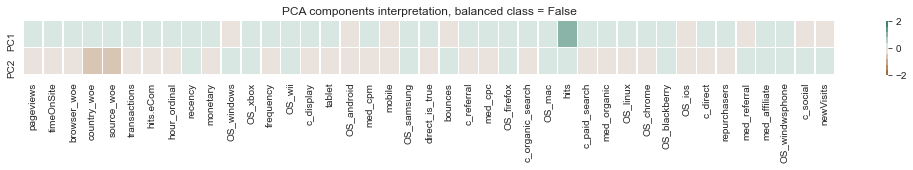

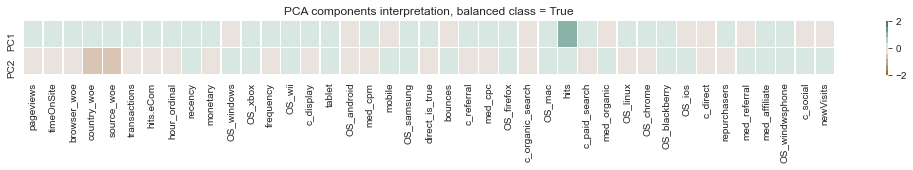

In [9]:
pca_transformed,pca_components,pca=pca_transfo(df_scaled, full=False)
pca_transformed_full,pca_components_full,pca_full=pca_transfo(df_scaled_full, full=True)

In [10]:
print(len(pca_transformed_full), len(df_scaled_full))

99040 99040


### 4.2. FAMD 

Factor analysis of mixed data (FAMD) is a dimension reduction method that can be used for data with mixed types of variables. Dimension reduction is often used as a data pre-processing step prior to further analyses. However, this approach should be used with caution as it depends on the purpose of the application.
http://d-scholarship.pitt.edu/36564/#:~:text=Factor%20analysis%20of%20mixed%20data,the%20purpose%20of%20the%20application.

https://towardsdatascience.com/factor-analysis-of-mixed-data-5ad5ce98663c

This algorithm generalizes the Principal Component Analysis (PCA) algorithm to mixed datasets. This method, operates by first one hot encoding the categorical variables. Each numerical variable is then standardized, by subtracting the mean and dividing by the standard deviation. The one hot encoded variables are treated slightly different as they are divided by the squared root of the proportion of objects in the column (the number of 1s over the number of observations in the column) and then centered (subtract the mean). Finally the PCA algorithm is executed on the resulting matrix to obtain the final output.

https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b

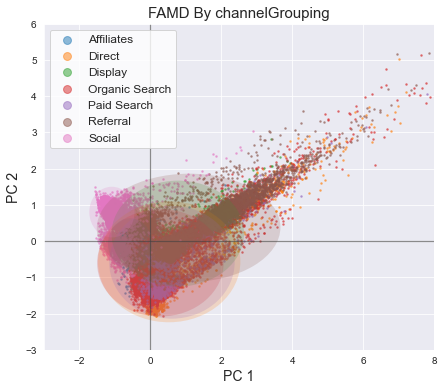

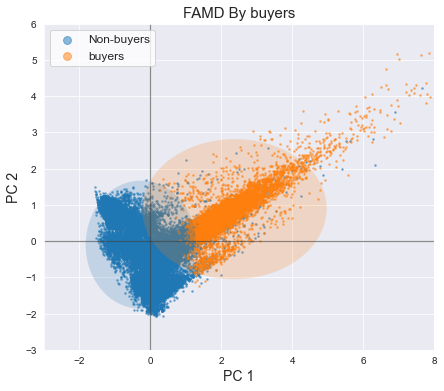

In [11]:
# TRANSFORMING df with FAMD
def  famd_visualizations(df_cat_scaled,famd, col):
    # creates the buyers class for visualization and change label
    df_cat_scaled["buyers"]=df_cat_scaled["monetary"]>0
    df_cat_scaled=df_cat_scaled.replace({False: "Non-buyers", True: "buyers"})
    
    # 
    ax=famd.plot_row_coordinates(df_cat_scaled,
                                ax=None,
                                figsize=(7, 6),
                                x_component=0,
                                y_component=1,
                                # labels=X.index,
                                color_labels=['{}'.format(t) for t in df_cat_scaled[col]],
                                ellipse_outline=False, s=2.5,alpha=0.5,
                                ellipse_fill=True,
                               show_points=True)
    ax.set_title("FAMD By {}".format(col),fontsize=15)
    ax.set_xlabel("PC 1",size=14)
    ax.set_ylabel("PC 2",size=14)
    ax.set_xlim(-3, 8)
    ax.set_ylim(-3, 6)
    ax.grid(True)
    ax.legend(fontsize=12,markerscale=5,loc=2,facecolor="white")
    fig = ax.get_figure()
    del df_cat_scaled["buyers"]
    return fig


def famd():
    num_cols=['pageviews','timeOnSite','transactions',
                 'hits.eCom','hour_ordinal',
                  'recency','monetary']
    cat_columns=['channelGrouping', 'geoNetwork.country',
       'trafficSource.source', 'trafficSource.medium', 'device.browser',
       'device.operatingSystem', 'device.deviceCategory']
    
    # recovers drop features
    filename="datasets\A1_B2_data_dropped_features.csv"
    df_cat=pd.read_csv(filename)
    df_cat=df_cat[cat_columns]
    df_cato=read_file()
    df_cat.index=df_cato.index
    
    # concatenate with numeric features to form the mixed data frame
    df_concat=pd.concat([df_cato[num_cols],df_cat],axis=1)
    df_concat.head()
    
    # scale the mixed df 
    df_cat_scaled, scaler_cat, idx_cat, cols_cat=scale(df_concat,num_cols) 
  

    # convert to respective datatypes for famd to work
    df_cat_scaled.fillna(0,inplace=True)
    for col in num_cols:
        df_cat_scaled[col] = df_cat_scaled[col].astype(float)
    for col in cat_columns:
        df_cat_scaled[col] = df_cat_scaled[col].astype("object")
        
    # fits famd model
    famd = prince.FAMD(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
    X = famd.fit(df_cat_scaled)
    df_famd=famd.transform(df_cat_scaled)
    
    # saves df
    df_famd.to_csv("results/famd_transformed_df.csv")
    # saves famd model
    filename="models/famd.sav"
    pickle.dump(X, open(filename, 'wb'))

    
    #help(famd)
    # famd.eigenvalues_
    #returns correlation
    correlations=np.round(famd.column_correlations(df_cat_scaled).sort_values(by=1,ascending=False).head(10),3)
    # X.explained_inertia_

    # returning and save visualizations
    fig1=famd_visualizations(df_cat_scaled,X,col='channelGrouping')
    fig1.savefig('visualizations/famd_by_channel.png', bbox_inches='tight')
    
    fig2=famd_visualizations(df_cat_scaled,X,col='buyers')
    fig2.savefig('visualizations/famd_by_buyers.png', bbox_inches='tight')
    
    return df_cat_scaled,df_famd,correlations,famd,X
df_cat_scaled,df_famd,correlations,famd,X=famd()


## 5- PERFORMING K-means clustering

### 5.1 Calculating metrics to find optimal k

In [12]:
# code reference  creates a table for visualization
# https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png#:~:
# text=Saving%20a%20pd.,row%20colors%20for%20better%20readability.

def save_df_as_image(df, path):
    source = ColumnDataSource(df)
    df_columns = [df.index.name]
    df_columns.extend(df.columns.values)
    columns_for_table=[]
    for column in df_columns:
        columns_for_table.append(TableColumn(field=column, title=column))

    data_table = DataTable(source=source, columns=columns_for_table,height_policy="auto",width_policy="auto",index_position=None)
    export_png(data_table, filename = path)

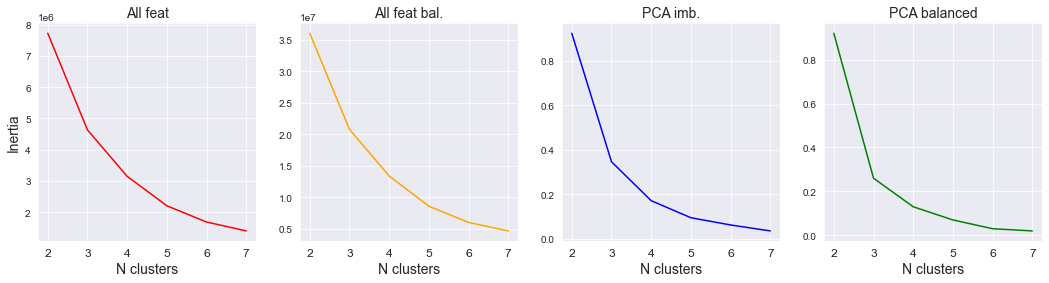

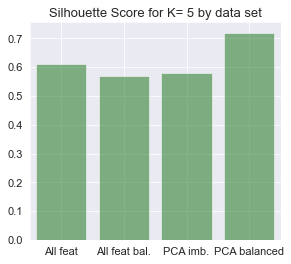

In [13]:

# takes a file and returns cores for k-means
def loop_cluster(df,download=True,pca=False,full=True):
    
    # tries to download the cache
    if download and not pca:
        try:
            if full:
                scores=pd.read_csv("results/scores_kmeans_full.csv")
                scores.rename(columns={"Unnamed: 0":"k clusters"},inplace=True)
                # print('downloading')
                return scores
            else:
                scores=pd.read_csv("results/scores_kmeans.csv")
                scores.rename(columns={"Unnamed: 0":"k clusters"},inplace=True)
                # print('downloading')
                return scores
                
        except:
            pass
        
    if download and pca:
        try:
            if full:
                scores=pd.read_csv("results/scores_pca_kmeans_full.csv")
                scores.rename(columns={"Unnamed: 0":"k clusters"},inplace=True)
                # print('downloading')
                return scores
            else:
                scores=pd.read_csv("results/scores_pca_kmeans.csv")
                scores.rename(columns={"Unnamed: 0":"k clusters"},inplace=True)
                # print('downloading')
                return scores
        except:
            pass
            
    
    if "CLUSTERS" in df.columns:
        del df["CLUSTERS"]
    arr=np.array(df)
    start=2
    end=8
    scores=defaultdict(list)
    for n in tqdm(range(start,end)):
        model=cluster.KMeans(n_clusters=n,random_state=10)
        model.fit(arr)      
        labels= model.labels_

        scores["inertia"].append(model.inertia_)
        scores["silhouette"].append(round(silhouette_score(df,labels),2))
        scores["bouldin"].append(round(davies_bouldin_score(df,labels),2))  
        scores["calinski"].append(np.int64(calinski_harabasz_score(df,labels)))
        # sd_score=SD(arr, labels,centers_id=None,  alg_noise='bind',centr='mean', nearest_centr=True, metric='euclidean')
        # scores["S_Dbw"].append(round(sd_score,2))  
  
    scores_df=pd.DataFrame(data=scores, index=range(start,end))
    if pca:
        if full:
            scores_df.to_csv("results/scores_pca_kmeans_full.csv")  
        else:
            scores_df.to_csv("results/scores_pca_kmeans.csv") 
            
    else:
        if full:
            scores_df.to_csv("results/scores_kmeans_full.csv") 
        else:
            scores_df.to_csv("results/scores_kmeans.csv") 
            
       
    return scores_df

# returns scores for all 4 datasets (15 minutes to run, so please select the load=True )

def scores_kmeans(df_scaled,df_scaled_full,pca_components,pca_components_full,load=True):   
    scores1=loop_cluster(df_scaled,download=load,pca=False,full=False)
    scores2=loop_cluster(df_scaled_full,download=load,pca=False,full=True)
    scores3=loop_cluster(pca_components,download=load,pca=True,full=False)
    scores4=loop_cluster(pca_components_full,download=load,pca=True,full=True).round(2)
    save_df_as_image(scores4, path="visualizations/scores4_table.png")
    
    return scores1,scores2,scores3,scores4

def plot_elbow_complete(cluster_scores):
    start=2
    end=8
    titres=list(cluster_scores.columns)
    colors = ['red', 'orange', 'blue',"green"]

    labels=[x for x in range(start-1,end-1)]
    labelsX=[x for x in range(start-1,end)]
    
    fig, axs = plt.subplots(1,4)
    fig.set_size_inches(18, 4)
    
    for i in range (0,4):
        y=cluster_scores.iloc[:,i].values
        axs[i].plot(labels,y,color=colors[i])
        axs[i].set_title(titres[i],fontsize=14)
        axs[i].set_xticklabels(labelsX, fontdict=None, minor=False,rotation=0,size=12)
        axs[i].set_xlabel("N clusters",size=14)
        if i==0:
            axs[i].set_ylabel("Inertia",size=14)
    fig.savefig('visualizations/elbow_kmeans.png', bbox_inches='tight')
    plt.show()
                           
def join_data_sets(scores1,scores2,scores3,scores4):
    # a=["All feat. - imbalanced", "All feat. - balanced", "PCA - imbalanced", "PCA - balanced class"]
    total=scores1
    total["All feat"]=total["inertia"].values
    total["All feat bal."]=scores2["inertia"]
    total["PCA imb."]=scores3["inertia"]
    total["PCA balanced"]=scores4["inertia"]
    try:
        total.set_index("k clusters", inplace=True)
    except:
        pass
    
    total=total[["All feat","All feat bal.","PCA imb.","PCA balanced"]]
    plot_elbow_complete(total)

    silhouette={}
    silhouette["All feat"]=scores1.silhouette.values
    silhouette["All feat bal."]=scores2.silhouette.values
    silhouette["PCA imb."]=scores3.silhouette.values
    silhouette["PCA balanced"]=scores4.silhouette.values
    df_sil=pd.DataFrame(data=silhouette).iloc[4,:]
    df_sil.values
    ax=sns.barplot(y=df_sil.values,x=df_sil.index, color="green",alpha=0.5)
    ax.set_title("Silhouette Score for K= 5 by data set", size=13)
    ax.grid(True)
    for element in (ax.get_xticklabels() + ax.get_yticklabels()):
        element.set_fontsize(11)
        
    fig1 = ax.get_figure()
    fig1.set_size_inches(4.5, 4)
    fig1.savefig('visualizations/silhouette_score.png', bbox_inches='tight')
    
    return total

scores1,scores2,scores3,scores4=scores_kmeans(df_scaled,df_scaled_full,pca_components,pca_components_full,load=True)
joint_data=join_data_sets(scores1,scores2,scores3,scores4)

In [14]:
scores4

,k clusters,inertia,silhouette,bouldin,calinski
0,2,0.92,0.83,0.11,41
1,3,0.26,0.73,0.29,118
2,4,0.13,0.70,0.34,173
3,5,0.07,0.71,0.32,247
4,6,0.03,0.72,0.31,436
5,7,0.02,0.75,0.29,570


### 5.2 Performing kmeans on pca balanced classes

In [15]:
## performing k-means clustering on df and returns labels you need to set the number of clusters
## as well as all the needed groupby dataframes
#########
# SET NUMBER OF CLUSTERS
n_clusters=5
#########

def cluster_predict(n,df_scaled, pca_df,df):
    cluster_names=["A","B","C","D","E"]
    cluster1="CLUSTERS"

    idx=df_scaled.index
    cols=list(df.columns)
    
    try:
        del(df["CLUSTERS"])
    except:
        pass
    try:
        del(pca_df["CLUSTERS"])
    except:
        pass
    try:
        del(df_scaled["CLUSTERS"])
    except:
        pass
  
    model=cluster.KMeans(n_clusters=n,random_state=10)
    
    
       
    try:
        if len(pca_df)>0:
            labels=list(model.fit_predict(pca_df))
            model.fit(pca_df)
            # upload, saves model
            # save the model to disk
            pickle.dump(model, open("models/kmeans_pca_k5.sav", 'wb'))
            
    except:
        labels=list(model.fit_predict(df_scaled))
        
    # Ranking labels according to count  
    unique_labels=list(Counter(labels))
   
    # returning df_scaled with cluster names
    try:        
        df_scaled[cluster1]=labels
    except:
        df_scaled=pd.DataFrame(data=df_scaled, columns=cols,index=idx)
        df_scaled[cluster1]=labels
    
      
    # replacing label values with ordered unique_labels
    df_scaled[cluster1]=df_scaled[cluster1].replace(unique_labels,cluster_names[:len(unique_labels)])    
    df[cluster1]=df_scaled[cluster1]
   
    # create an ordered group_by with natural mean for key dimensions and save date
    groupe=df.groupby("CLUSTERS").mean().round(2)
    groupe["count"]=df.groupby("CLUSTERS").size().round(2)
    # move count to the first place
    first_column = groupe.pop('count')
    groupe.insert(0, 'count', first_column)
    groupe.sort_values(by='count', ascending=False, inplace=True)
    
    save_df_as_image(groupe.iloc[:,:10], path="visualizations/table_groupe_clusters_kmeans.png")
    groupe.to_csv("results/pca_groupe_clusters.csv")
    
   
    # create group_by with mean for Z values of key dimensions
    groupe_z=df_scaled.groupby("CLUSTERS").mean().round(2)
    groupe_z["count"]=df_scaled.groupby("CLUSTERS").size().round(2)
    # move count to the first place
    first_column = groupe_z.pop('count')
    groupe_z.insert(0, 'count', first_column)
    groupe_z.sort_values(by='count', ascending=False, inplace=True)
    
    try:
        if len(pca_df)>0:
            pca_df[cluster1]=df_scaled[cluster1]    
            return pca_df,df,groupe_z, groupe
    except:
        return df,groupe_z, groupe
    
def heat_map(groupe_z,n_clusters, download):
    if download:
        try:
            img = Image.open('visualizations/heat_map_pca_full.png')
            img.show()
            return img
        except:
            pass
    
    
    try:
        del groupe_z["count"]
    except:
        pass
    
    fig = plt.figure()
    fig.set_size_inches(30, 2)
    
    ax2 = plt.subplot(121)
    ax2 = sns.heatmap(groupe_z,vmin=-.2, vmax=1, cmap=sns.diverging_palette(240, 20, n=9),center=0,annot=False,
                     linewidths=0.1, linecolor='gray')
    ax2.set_title("Cluster interpretation: dimensions heatmap",fontsize=14)
    ax2.set_xticklabels(list(groupe_z.columns), fontdict=None, minor=False,rotation=90)
    fig.savefig('visualizations/heat_map_pca_full.png', bbox_inches='tight')
    
    return fig
    

    
pca_df_full,df_full,groupe_z_full, groupe_full=cluster_predict(n_clusters,df_scaled_full, pca_transformed_full,df_full)


In [16]:
groupe_full

,count,hits,pageviews,timeOnSite,transactions,newVisits,bounces,hits.eCom,monetary,frequency,...,OS_linux,OS_mac,OS_wii,OS_samsung,OS_windows,OS_windwsphone,OS_xbox,OS_ios,mobile,tablet
CLUSTERS,,,,,,,,,,,,,,,,,,,,,
A,51419,3.57,3.26,98.06,0.10,0.74,0.48,0.02,9.75,1.22,...,0.03,0.32,0.0,0.0,0.38,0.0,0.0,0.09,0.17,0.03
B,30140,25.74,21.31,783.47,0.93,0.24,0.00,0.05,94.46,1.38,...,0.02,0.35,0.0,0.0,0.08,0.0,0.0,0.02,0.03,0.01
D,14203,55.61,42.47,1506.48,1.03,0.22,0.00,0.04,173.69,1.52,...,0.02,0.36,0.0,0.0,0.07,0.0,0.0,0.01,0.01,0.00
C,3095,111.10,79.81,2665.67,1.23,0.16,0.00,0.06,352.82,1.85,...,0.01,0.30,0.0,0.0,0.10,0.0,0.0,0.00,0.01,0.01
E,183,293.37,215.28,6253.33,2.22,0.06,0.00,0.04,852.22,2.15,...,0.01,0.09,0.0,0.0,0.26,0.0,0.0,0.00,0.02,0.01


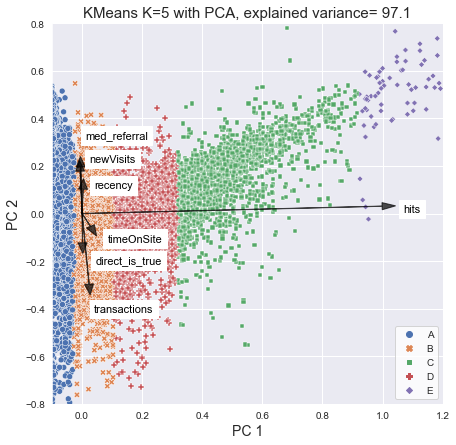

In [17]:
def biplot_df(pca_components):
    # takes a pca components df and return a shortlist of components for visualization on the biplot
    liste=["transactions", "hits","newVisits","med_referral","direct_is_true","timeOnSite", "recency"]
    pca_components.sort_values("PC2")
    short_pca=pca_components.T
    short_pca=short_pca[liste].T
    short_pca["x"]=[0.04,1.07,0.025,0.01,0.045,0.085,0.04]
    short_pca["y"]=[-0.38,0.04,0.25,0.35,-0.175,-0.085,0.14]
    
    return short_pca
    

def biplot(pca_transformed,coeff,pca_cum, download):
    if download:
        try:
            img = Image.open('visualizations/B2_clustering_and_biplot.png')
            img.show()
            return img
        except:
            pass
        
     
        
    # visualizes biplot and clustering algorithm
    HUE='CLUSTERS'
    labels=(coeff.index)

    zoom = 1.2
    x=2
    y=3
    xs = pca_transformed.iloc[:,0]
    ys = pca_transformed.iloc[:,1]    
    width = 2.0 * zoom
    scalex = width/(xs.max()- xs.min())
    scaley = width/(ys.max()- ys.min())
    text_scale_factor = 1.15
        
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    
    # plt.scatter(xs*scalex, ys*scaley, s=0.05,alpha=0.5)
    ax1=sns.scatterplot(data=pca_transformed, x=xs*scalex, y=ys*scaley, hue=HUE, palette="deep",style=HUE)
    ax1.set_title("KMeans K=5 with PCA, explained variance= {}".format(round(pca_cum*100,1)), size=15)
    ax1.grid(True)
    ax1.legend(facecolor="white")
    # plt.grid(color='w', linestyle='-', linewidth=2)
    # ax1.legend(fontsize=14)
    arr=np.array(coeff)
    n=arr.shape[0]
    
    for i in range(n):
        
        plt.arrow(0, 0, arr[i,0], arr[i,1],color='black',alpha=0.7, head_width = 0.03) 
        if labels is None:
            plt.text(arr[i,x]* 1.5, 
                     arr[i,y] * text_scale_factor, 
                     "Var"+str(i+1), color='b', ha='left', va='center')
        else:
            plt.text(arr[i,x], 
                     arr[i,y], 
                     labels[i], color='black', backgroundcolor="white", fontsize=11,ha='left', va='top') #backgroundcolor="white",
            
    plt.grid(color='w', linestyle='-', linewidth=1)
    plt.xlim(-0.1,zoom)
    plt.ylim(-0.8,0.8)
    plt.xlabel("PC 1",fontsize=14)
    plt.ylabel("PC 2", fontsize=14)

    
    fig.savefig('visualizations/B2_clustering_and_biplot.png', bbox_inches='tight')
    return fig
    # plt.figure()

short_pca=biplot_df(pca_components_full) 
fig_pca=biplot(pca_transformed_full,short_pca,pca_cum[2], download=True)
fig_pca

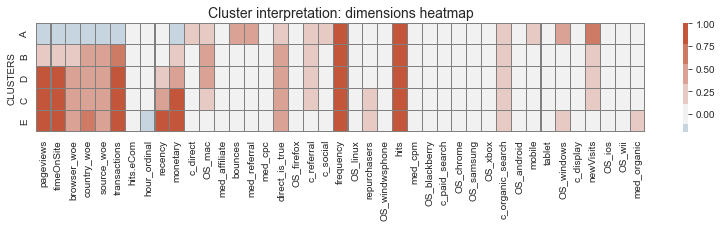

In [18]:
fig=heat_map(groupe_z_full,n_clusters,download=True)
fig


In [19]:
groupe_full

,count,hits,pageviews,timeOnSite,transactions,newVisits,bounces,hits.eCom,monetary,frequency,...,OS_linux,OS_mac,OS_wii,OS_samsung,OS_windows,OS_windwsphone,OS_xbox,OS_ios,mobile,tablet
CLUSTERS,,,,,,,,,,,,,,,,,,,,,
A,51419,3.57,3.26,98.06,0.10,0.74,0.48,0.02,9.75,1.22,...,0.03,0.32,0.0,0.0,0.38,0.0,0.0,0.09,0.17,0.03
B,30140,25.74,21.31,783.47,0.93,0.24,0.00,0.05,94.46,1.38,...,0.02,0.35,0.0,0.0,0.08,0.0,0.0,0.02,0.03,0.01
D,14203,55.61,42.47,1506.48,1.03,0.22,0.00,0.04,173.69,1.52,...,0.02,0.36,0.0,0.0,0.07,0.0,0.0,0.01,0.01,0.00
C,3095,111.10,79.81,2665.67,1.23,0.16,0.00,0.06,352.82,1.85,...,0.01,0.30,0.0,0.0,0.10,0.0,0.0,0.00,0.01,0.01
E,183,293.37,215.28,6253.33,2.22,0.06,0.00,0.04,852.22,2.15,...,0.01,0.09,0.0,0.0,0.26,0.0,0.0,0.00,0.02,0.01


A- clikers & bouncers

B- Buyers. Medium peak hour. Computer users.

C- Repeaters. Computer. Peak hour. Chrome. Decided to buy (few ecom actions)

D- Browsers, exploring what to buy. Mobile users. Medium peak hour. 


## 6- ASSESSING KMEDOIDS

https://stats.stackexchange.com/questions/476286/when-to-use-k-medoids-instead-of-k-means#:~:text=From%20Wikipedia%3A%20It%20is%20more,sum%20of%20squared%20Euclidean%20distances.&text=You%20may%20also%20want%20to,the%20points%20in%20your%20dataset.
From Wikipedia: It is more robust to noise and outliers as compared to k-means because it minimizes a sum of pairwise dissimilarities instead of a sum of squared Euclidean distances. – 
user2974951 Jul 9, 2020 at 7:40
You may also want to use K-medoid when you want the representers of the classes to be one of the points in your dataset.

https://analyticsindiamag.com/comprehensive-guide-to-k-medoids-clustering-algorithm/

K-Medoids is a clustering algorithm resembling the K-Means clustering technique. It falls under the category of unsupervised machine learning. It majorly differs from the K-Means algorithm in terms of the way it selects the clusters’ centres. The former selects the average of a cluster’s points as its centre (which may or may not be one of the data points) while the latter always picks the actual data points from the clusters as their centres (also known as ‘exemplars’ or ‘medoids’). K-Medoids also differs in this respect from the K-Medians algorithm whic,h is the same as K-means, except that it chooses the medians (instead of means) of the clusters as centres.

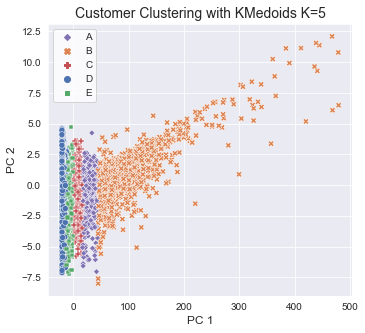

In [20]:
def scatter2(data, titre,HUE="CLUSTERS"):
    
    cols=["PC1","PC2"]
    pcn=2
    
    fig = plt.figure()
    fig.set_size_inches(12, 5)

    ax1 = plt.subplot(121)
    if HUE:
        ax1=sns.scatterplot(data=data, x="PC1", y="PC2", hue=HUE, palette="deep",style=HUE)
    else:
        ax1=sns.scatterplot(data=data, x="PC1", y="PC2", palette="deep")
    ax1.set_xlabel("PC 1",fontsize=12)
    ax1.set_ylabel("PC 2",fontsize=12)
    ax1.set_title(label=titre,fontsize=14)
    ax1.set_facecolor('#EAEAF2')

    
    handles, labels = ax1.get_legend_handles_labels()
    
    if HUE:
        # sort both labels and handles by labels
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        ax1.legend(handles, labels,facecolor="white")
    
    return fig

def cluster_kmedoids(pca_transformed_full, download=True):
    filename = 'models/kmedoidsfinalized_model.sav'
    
    if download:
        try:
        # load the model from disk
            kmedoids = pickle.load(open(filename, 'rb'))
            # result = loaded_model.score(X_test, Y_test)
            kmedoids_df=pd.read_csv("results/kmedoids_df.csv")
            kmedoids_df.rename(columns = {'Unnamed: 0':'idx'}, inplace = True)
            kmedoids_df.set_index('idx',inplace=True)
            img = Image.open('visualizations/kmedoids.png')
            img.show()
            return kmedoids_df,kmedoids, img
        except:
            pass


    else:
    
        try:
            del pca_transformed_full["CLUSTERS"]
        except:
            pass
        # sparse_matrix = scipy.sparse.csr_matrix(dense_matrix)
        kmedoids_df=pca_transformed_full.sample(frac=0.50,random_state=32)
        kmedoids = KMedoids(n_clusters=5, random_state=655).fit(kmedoids_df)
        kmedoids_df["CLUSTERS"]=kmedoids.labels_
        cluster_names=["A","B","C","D","E","F","G"]
        unique_labels= list(Counter(kmedoids.labels_))
        kmedoids_df["CLUSTERS"]=kmedoids_df["CLUSTERS"].replace(unique_labels,cluster_names[:len(unique_labels)])

        kmedoids_df.to_csv("results/kmedoids_df.csv")
        # save the model to disk

        pickle.dump(kmedoids, open(filename, 'wb'))
     
    fig=scatter2(kmedoids_df,"Customer Clustering with KMedoids K=5",HUE="CLUSTERS")
    fig.savefig('visualizations/kmedoids.png', bbox_inches='tight')
   

    return kmedoids_df,kmedoids, fig

def kmedoids_scores(kmedoids_df,kmedoids, download=True):
    if download:
        score_medoids={'silhouette': 0.61, 'bouldin': 0.57}
    else:
        
        labels= kmedoids.labels_
        score_medoids={}
        df=kmedoids_df.copy()
        del df["CLUSTERS"]
        score_medoids["silhouette"]=(round(silhouette_score(df,labels),2))
        score_medoids["bouldin"]=(round(davies_bouldin_score(df,labels),2))  

    y=list(score_medoids.values())
    x=list(score_medoids.keys())

    ax=sns.barplot(y=y,x=x, color="green",alpha=0.5)
    
    ax.set_title("Kmedoids Score for K= 5", size=15)
    
    ax.set_ylim(0, .75)
    for element in (ax.get_xticklabels() + ax.get_yticklabels()):   
        element.set_fontsize(13)
    
    ax.legend(facecolor="white")
    
    fig2 = ax.get_figure()
    fig2.set_size_inches(3,3)
    fig.savefig('visualizations/scores_medoids.png', bbox_inches='tight')
    
kmedoids_df,kmedoids,figmedoids=cluster_kmedoids(pca_transformed_full, download=True)
figmedoids

## 7- ASSESSING DBSCAN

Sample a subset of points (say, 10%).
Compute the K-nearest-neighbor distance for each point using small K (e.g. k = 1). 
Set “eps” to some small multiple (e.g. 3x) of the median of this distance distribution.
Set “min_samples” to a small value (e.g. 5).
Try increasing multiples of “eps”, and adjusting “min_samples” to see the effect on cluster structure.


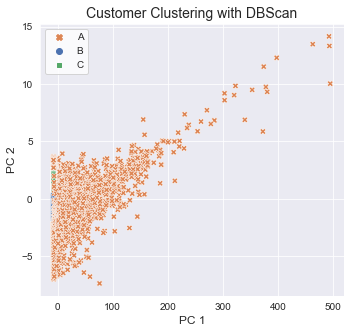

In [21]:
# estimating eps
def dbscan_eps(df_scaled):

    sample=df_scaled.sample(frac=0.10,random_state=32)
    y=np.int64(sample["monetary"]>0)
    X=np.array(sample)

    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X, y)
    mole=neigh.kneighbors(X=X[1,:].reshape(1,45), n_neighbors=None, return_distance=True)
    cum=[]
    poulet=0
    for i in range(0,len(X)):    
        mole=neigh.kneighbors(X=X[i,:].reshape(1,45), n_neighbors=1, return_distance=True)
        cum.append(mole[0][0][0])
        poulet=poulet+mole[0][0][0]
    EPS1=np.median(cum)
    EPS=poulet/len(X)
    return EPS

# returning dbscan scores
def dbscan_scores(pca,download=True):
    eps_list = list(np.round(np.linspace(0.03, 0.36, 11, endpoint=False),3))
    if download:
        df_dbscan=pd.read_csv("results/dbscan_scores.csv").iloc[:,1:]
        filename="models/dbscan.sav"
        dbscan = pickle.load(open(filename, 'rb'))
        df_dbscan["eps"]=eps_list
        df_dbscan.set_index("eps", inplace=True)
        return df_dbscan

    Sample_400=defaultdict(list)
    Sample_1000=defaultdict(list)
    df_dbscan=pd.DataFrame(columns=["Sample_400","silhouette_400","bouldin_400","Sample_1000",
                                   "silhouette_1000","bouldin_1000",], index=np.round(eps_list,3))
    min_samples=[400,1000]

    
    X=np.array(pca)
    
    for sample in min_samples:
        truc=[]
        machin=[]
        trucmuche=[]
        for eps in tqdm(eps_list):
            dbscan = cluster.DBSCAN(eps=eps, min_samples=sample)
            labels = dbscan.fit_predict(X)
            n=len(list(np.unique(labels)))
            truc.append(n)
            if n>1:
                machin.append(round(silhouette_score(df_scaled,labels),2))
                trucmuche.append(round(davies_bouldin_score(df_scaled,labels),2)) 
            else:
                machin.append(None)
                trucmuche.append(None)

        df_dbscan["Sample_"+str(sample)]=truc
        df_dbscan["silhouette_"+str(sample)]=machin
        df_dbscan["bouldin_"+str(sample)]=trucmuche
    df_dbscan.to_csv("results/dbscan_scores.csv")
    save_df_as_image(dbscan_scores, path="visualizations/dbscan_table.png")
    return df_dbscan




## returns dbscan clusters
def cluster_predict(pca,download):
    if download:
        try:         
            img = Image.open('visualizations/DBScan.png')
            img.show()
            return img
            
        except:
            pass
        
    cluster_names=["A","B","C","D","E"]
    cluster1="CLUSTERS"
    try:
        del pca["CLUSTERS"]
    except:
        pass   
    eps = list(np.round(np.linspace(0.03, 0.36, 11, endpoint=False),3))[4]       
    X=np.array(pca)
    dbscan = cluster.DBSCAN(eps=eps, min_samples=1000)
    model=dbscan.fit(X)
    labels = dbscan.fit_predict(X)
    counter=Counter(labels)
    unique_labels=list(np.unique(labels))
    n=len(unique_labels)
    pca[cluster1]=labels  
    
    pca["CLUSTERS"]=pca["CLUSTERS"].replace(unique_labels,cluster_names[:len(unique_labels)])
    
    # save csv file to disk
    pca.to_csv("results/dbscan_df.csv")
        
    # save the model to disk
    pickle.dump(model, open("models/dbscan.sav", 'wb'))
        
    fig=scatter2(pca,"Customer Clustering with DBScan",HUE="CLUSTERS")
    fig.savefig('visualizations/DBScan.png', bbox_inches='tight')
    return pca

dbscan_scores=dbscan_scores(pca_transformed.iloc[:,:2],download=True)   
fig_DBSCAN=cluster_predict(pca_transformed,download=True)
fig_DBSCAN

In [22]:
dbscan_scores

,Sample_400,silhouette_400,bouldin_400,Sample_1000,silhouette_1000,bouldin_1000
eps,,,,,,
0.03,3,-0.29,4.41,1,NaN,NaN
0.06,5,-0.10,1.99,1,NaN,NaN
0.09,5,-0.11,4.18,4,-0.22,4.12
0.12,4,-0.11,1.85,4,-0.11,2.73
0.15,7,-0.29,2.83,2,0.08,0.88
0.18,15,-0.31,3.34,2,0.10,0.87
0.21,22,-0.29,3.88,3,-0.10,1.83
0.24,23,-0.25,3.97,3,-0.09,1.84
0.27,29,-0.24,4.17,3,-0.08,1.86


## 8- RFM clustering

importando csv file


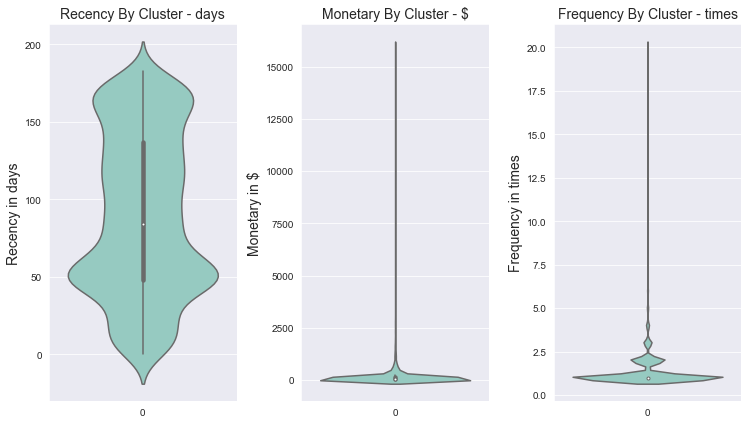

In [24]:
def loading_rfm():
    try:
        rfm=pd.read_csv("datasets/B1_rfm_data.csv")
        print("importando csv file")
    except:
        print("failed to import")
    if "class" in list(rfm.columns):
        del rfm["class"]
    if 'fullVisitorId' in rfm.columns:
        rfm.set_index('fullVisitorId',inplace=True)
    rfm_buyers=rfm[rfm["Monetary"]>0]
    
    try:
        del rfm_buyers["buyers"]
    except:
        pass
    
    num_cols=['Recency',"Monetary","Frequency"]
    
    rfm_scaled, rfm_scaler,index,cols=scale(rfm_buyers,num_cols,array=True) 
    
    return rfm_buyers,rfm_scaled

# EDA - visualizing key customers data in a violin plot
def plot_rfm(rfm):
    cols=list(rfm.columns)
    units=["days","$","times"]
    ax=["ax1","ax2","ax3"]
    liste_zip=zip(cols,units,ax)

    # Ploting the figure
    fig = plt.figure()
    fig.set_size_inches(14, 6)

    i=1
    for metrics,units,ax in liste_zip:
        ax = plt.subplot(1,4,i)
        ax = sns.violinplot(data=np.array(rfm[metrics]),palette="Set3")
        # ax = sns.violinplot(x=cols, y=metrics, data=Det1,palette="Set3")
        ax.set_ylabel('{} in {}'.format(metrics,units),fontsize=14)
        ax.set_title("{} By Cluster - {}".format(metrics,units),fontsize=14)
        i+=1

    plt.tight_layout()
    plt.show()

rfm_buyers,rfm_scaled=loading_rfm()
plot_rfm(rfm_buyers) 

In [25]:

def cluster_score(df,download):
    if download:
        try:
            scores=pd.read_csv("scores_kmeans_rfm_buyers.csv")
            return scores
        except:
            pass
        
    mod="kmeans"
    # uses cache, tries to download file
    end=7 # will iterate over 6 clusters
    try:
        scores=defaultdict(list)
        pass #scores=pd.read_csv("scores_{}.csv".format(mod),index_col="index")
        # return scores
    except:           
        scores=defaultdict(list)
        
    start=2
    
    try:
        del(df["CLUSTERS"])
    except:
        pass
    
    df=np.array(df)

    for n in range(start,end):
        if mod=="kmeans":            
            model=cluster.KMeans(n_clusters=n,random_state=10, max_iter=300)
        if mod=="dbscan":
            model=DBSCAN(eps=n, min_samples=2)            
        
        model.fit(df)      
        labels = model.labels_
        
        try:
            scores["inertia"].append(np.int64(model.inertia_))
        except:
            pass

        scores["silhouette"].append(round(silhouette_score(df,labels),2))
        scores["bouldin"].append(round(davies_bouldin_score(df,labels),2))  
        scores["calinski"].append(np.int64(calinski_harabasz_score(df,labels)))
        
    scores=pd.DataFrame(data=scores, index=range(start,end)) 
    
    # UPLOAD
    (scores.reset_index()).to_csv("scores_{}.csv".format("kmeans_rfm_buyers"),index=False)
    
    return scores

## performing k-means clustering on df and returns labels you need to set the number of clusters
## as well as all the needed groupby dataframes
n_clusters=4
def cluster_predict2(n,df_scaled, df,download):
    if download:
        try:
            groupe=pd.read_csv("group_rfm_buyers.csv")
            return groupe
        except:
            pass
            
    cluster_names=["A","B","C","D","E","F","G"]
    cluster1="CLUSTERS"
    
    index=list(df.index)
    cols=list(df.columns)
    
    try:
        del(df["CLUSTERS"])
    except:
        pass
    try:
        del(df_scaled["CLUSTERS"])
    except:
        pass
    try:
        del(pca_df["CLUSTERS"])
    except:
        pass
    model=cluster.KMeans(n_clusters=n,random_state=10)
    
    try:
        if len(pca_df)>0:
            labels=list(model.fit_predict(pca_df))
    except:
        labels=list(model.fit_predict(df_scaled))
    
    # returning df_scaled with cluster names
    try:        
        df_scaled[cluster1]=labels
    except:
        df_scaled=pd.DataFrame(data=df_scaled, columns=cols,index=index)
        df_scaled[cluster1]=labels
    unique_labels=list(np.unique(labels))
    
    df_scaled[cluster1]=df_scaled[cluster1].replace(unique_labels,cluster_names[:len(unique_labels)])
    
    df[cluster1]=df_scaled[cluster1]
    
    
    groupe=df.groupby("CLUSTERS").mean().round(2)
    groupe["count"]=df.groupby("CLUSTERS").size().round(2)
    
    groupe_z=df_scaled.groupby("CLUSTERS").mean().round(2)
    
    groupe.to_csv("group_rfm_buyers.csv")
    
    return groupe


scores=cluster_score(rfm_scaled, download=True)
scores

,index,inertia,silhouette,bouldin,calinski
0,2,11455,0.43,1.03,1819
1,3,7718,0.47,0.87,2598
2,4,5993,0.50,0.82,2725
3,5,5119,0.50,0.85,2613
4,6,4548,0.48,0.87,2481


In [26]:
n_clusters=4
groupe_rfm=cluster_predict2(n_clusters,rfm_scaled, rfm_buyers,download=True)
groupe_rfm

,CLUSTERS,Recency,Monetary,Frequency,count
0,A,49.03,103.35,1.19,2587
1,B,141.15,123.45,1.19,2214
2,C,66.92,3913.96,4.06,50
3,D,68.71,387.04,3.84,313
